# 🎬 IMDB Movie Review Sentiment Analysis – Data Exploration

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [24]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv(path + '/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isnull().sum()

,0
review,0
sentiment,0


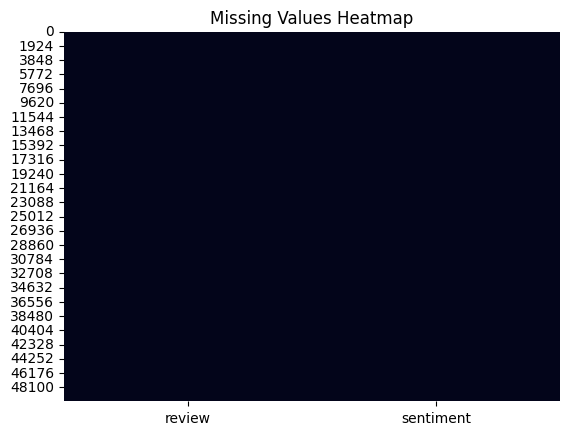

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

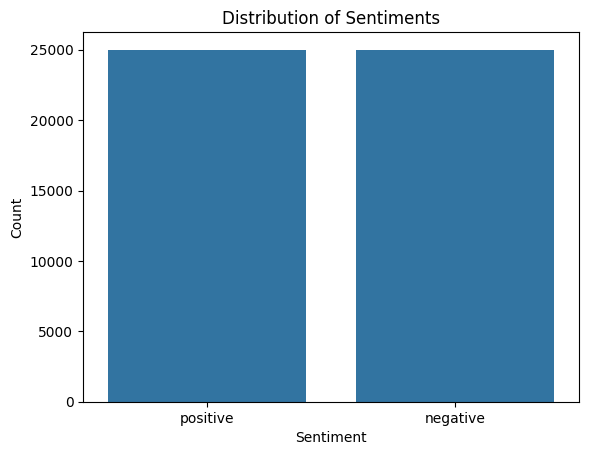

,proportion
sentiment,
positive,0.5
negative,0.5


In [20]:
sns.countplot(data=df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Count values
df['sentiment'].value_counts(normalize=True)

In [28]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['review'].apply(lambda x: len(str(x)))
df['avg_word_length'] = df['char_count'] / df['word_count']

df[['word_count','char_count','avg_word_length']].describe()

,word_count,char_count,avg_word_length
count,50000.000000,50000.000000,50000.000000
mean,231.156940,1309.431020,5.634164
std,171.343997,989.728014,0.340905
min,4.000000,32.000000,2.236486
25%,126.000000,699.000000,5.411392
50%,173.000000,970.000000,5.620934
75%,280.000000,1590.250000,5.841730
max,2470.000000,13704.000000,13.272727


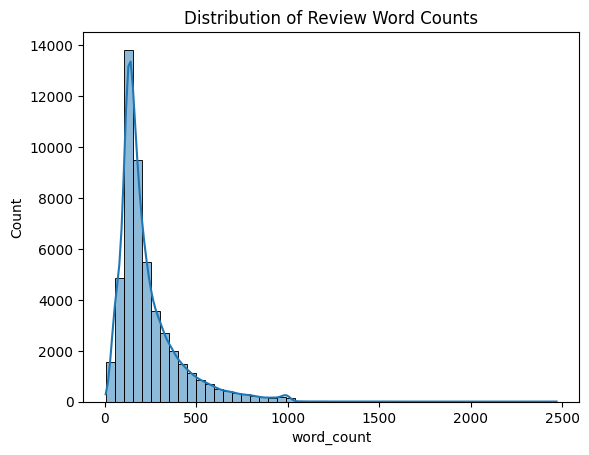

In [29]:
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Review Word Counts")
plt.show()

<Axes: xlabel='sentiment', ylabel='text_length'>

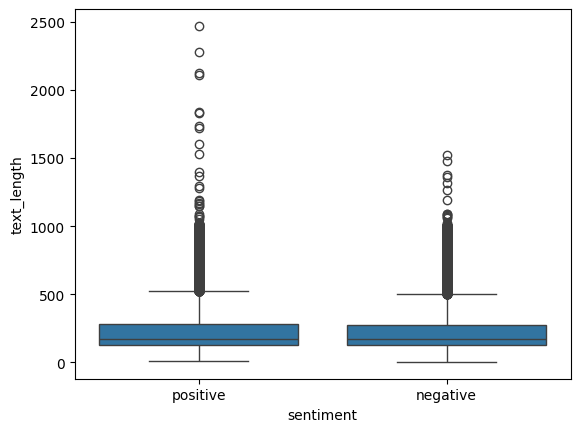

In [14]:
sns.boxplot(x='sentiment', y='text_length', data=df)

In [26]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

df['clean_review'] = df['review'].apply(clean_text)

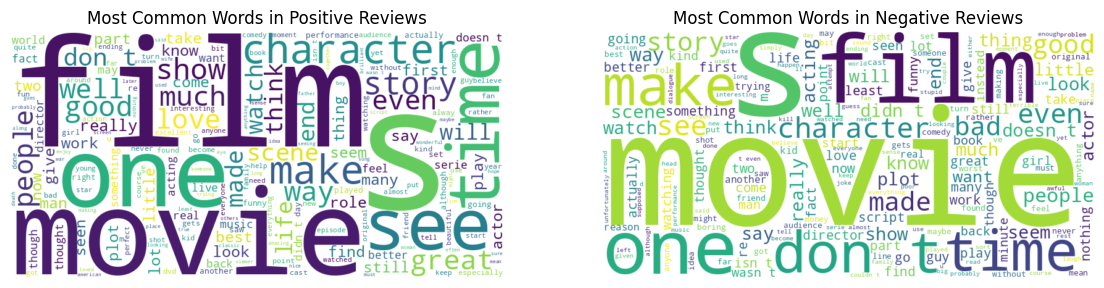

In [27]:
positive_text = " ".join(df[df['sentiment']=='positive']['clean_review'])
negative_text = " ".join(df[df['sentiment']=='negative']['clean_review'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_text), interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")

plt.show()

### 🔍 Insights
- The dataset contains 50000 reviews, with 50% labeled as negative.
- Word count distributed between 0 to 1000 words.
- Negative reviews tend to have slightly shorter texts on average.
- Frequent words in negative reviews include "bad", "doesn't", "didn't", etc.
- Data cleaning and tokenization will be required before modeling.